**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
**<center>ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА</center>**
**<center>на тему</center>**
**<center>«Анализ данных с использованием Python»</center>**
**<center>(на примере данных о погоде в Москве и сообщений о ДТП, оставляемые пользователями Яндекс-навигатора)</center>**
**<center>слушателя Максима Владимировича Воропаева</center>**
**<center>группы № 0859-ГЗ</center>**
**<center>по программе профессиональной переподготовки</center>**
**<center>«Аналитик данных»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
**<center>Москва, 2022</center>**

## Цель исследования:

Есть мнение, что как только начинается дождь или снег, водители начинают совершать больше ошиюок за рулем, что приводит к авариям. Проверим, действительно ли неблагоприятные погодные явления влияют на количество ДТП на дорогах Москвы.

Выполнение задачи предполагает:

1. Предобработку данных;
2. Исследовательский анализ данных;
3. Исследование статистических показателей;
4. Проверку гипотез;
5. Выводы.

Для анализа используется два набора данных. Первый собран на информационно-справочном портале "Погода и климат" (http://www.pogodaiklimat.ru/archive.php?id=ru&region=77). К сожалению, сайт не располагает возможностью формировать набор данных в удобном виде (csv или xls файл). Возможно лишь выводить погоду за один месяц. Поэтому для формирования датасета с погодой в Москве за 2021 и 2022 года было потрачено некое количество времени: запрашивал погоду помесячно, копировал в эксель-файл, проводил манипуляции по приведению строк в удобный для работы вид. В результате пришлось пожертвовать данными по формам облаков. 
Второй (данные о ДТП, оставляемые пользователями приложения Яндекс-навигатор) взят из DataLens — универсальный облачный инструмент для анализа и визуализации данных. С помощью DataLens можно создавать отчеты, таблицы и графики. Ссылка на ресурс: https://cloud.yandex.ru/

Шаг 1. Открытие первого файла с данными и изучение общей информации.

Шаг 2. Подготовка данных:

- Заменить названия столбцов для удобства дальнейшей работы.
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.
- Обработать пропуски при необходимости.
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.
- Описать причины, которые могли привести к пропускам.

Шаг 3. Открыть второй файл с данными, подготовить их и объединить оба набора данных в один по столбцу дат.

- Внести новый столбец "Месяцы" и "Дни недели" для анализа распределения осадков и ДТП по году и по дням. 

Шаг 4. Провести исследовательский анализ данных
- Определить самый дождливый день за 2021-2022.
- Построить график «ящик с усами» по скорости ветра, средней температуре и влажности. Построить диаграмму рассеяния и
посчитать корреляцию.

Шаг 5. Провести исследование статистических показателей
- Выполнить подсчитать среднего количества, дисперсии и стандартного отклонения для осадков и ДТП. Построить гистограммы. Описать распределения.

Шаг 6. Проверка гипотезы о том, что с увеличением количества осадков происходит рост ДТП.
- Построить линейную регрессию зависимости между осадками и ДТП, снегом и ДТП.

Выводы.

# 1. Предобработка данных

Импортируем необходимые для работы библиотеки:

In [1]:
import numpy as np # линейная алгебра
import pandas as pd # загрузка и обработка данных (метод pd.read_csv)
import matplotlib # визуализация данных
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # статистическая визуализация данных
import plotly.graph_objects as go # визуализация данных
import plotly.express as px # визуализация данных
%matplotlib inline
from seaborn import regplot
import scipy # статистика
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore') 

Загрузим собраный ранее xlsx-файл с погодой в Москве за 2021-2022 годы, посмотрим на первые пять строк:

In [2]:
df = pd.read_excel('data/moscow_weather_2021-2022.xlsx')
df.head(5)

,"Время, UTC",Дата,ВетерНапр,ВетерМС,Видим.,Явления,Облачность,"Т, С","Тd, С","f, %","Тe, С","Тes, С",Комфортность,"P, гПа","Po, гПа","Тmin, С","Tmax, С","R, мм","R24, мм","S, см"
0,0,2021-01-01,Ю,2.0,NaN,дымка,10/10 200 м,-1.0,-1.9,94.0,-5.0,-5.0,по сезону,1019.2,999.2,NaN,NaN,NaN,0.0,NaN
1,3,2021-01-01,Ю,2.0,NaN,дымка {дождь} [диам. гололёда 4 мм],10/10 100 м,-0.9,-1.7,94.0,-5.0,-5.0,по сезону,1018.7,998.8,-1.5,NaN,3.0,0.0,NaN
2,6,2021-01-01,ЮВ,1.0,1000.0,дымка {дождь} [диам. гололёда 4 мм],10/10 200 м,-0.9,-1.3,97.0,-3.0,-3.0,тепло,1018.4,998.5,-1.5,NaN,3.0,0.0,11.0
3,9,2021-01-01,ЮВ,2.0,4000.0,дымка [диам. гололёда 4 мм],10/10 200 м,-0.4,-1.0,96.0,-4.0,-4.0,по сезону,1018.5,998.6,NaN,NaN,NaN,NaN,NaN
4,12,2021-01-01,ЮВ,1.0,4000.0,слаб. дождь [диам. гололёда 4 мм],10/10 200 м,0.0,-0.6,96.0,-2.0,-2.0,тепло,1017.7,997.9,NaN,NaN,NaN,NaN,NaN


На сайте-источнике данных есть пояснения к столбцам:

http://www.pogodaiklimat.ru/weather.php?id=27612

- Ветер - указаны скорость ветра в м/с - средняя за 10 мин, порывы в срок и между сроками (в фигурных скобках) и направление, откуда дует ветер: С - северный, СВ - северо-восточный, В - восточный, ЮВ - юго-восточный, Ю - южный, ЮЗ - юго-западный, З - западный, СЗ - северо-западный.

- Видимость - горизонтальная дальность видимости в метрах или километрах. При видимости от 1 до 10 км при отсутствии осадков обычно наблюдается дымка, при ухудшении видимости до 1 км и менее - туман. В сухую погоду видимость может ухудшаться дымом, пылью или мглою.

- Явления - указаны атмосферные явления, наблюдавшиеся в срок или в последний час перед сроком; фигурными скобками обозначены явления, наблюдавшиеся между сроками (за 1-3 часа до срока); квадратными скобками обозначены град или гололедные отложения с указанием их диаметра в мм.

- Облачность - указаны через наклонную черту общая и нижняя облачность в баллах и высота нижней границы облаков в метрах; квадратными скобками обозначены формы облаков: Ci - перистые, Cs - перисто-слоистые, Cc - перисто-кучевые, Ac - высококучевые, As - высокослоистые, Sc - слоисто-кучевые, Ns - слоисто-дождевые, Cu - кучевые, Cb - кучево-дождевые. Подробнее классификацию облаков см. в Атласе облаков (PDF).

- T - Температура воздуха - температура, измеренная на высоте 2 м над землей.

- Td - Температура точки росы - температура, при понижении до которой содержащийся в воздухе водяной пар достигнет насыщения.

- f - Относительная влажность воздуха - влажноcть воздуха, измеренная на высоте 2 м над землей.

- Te - Эффективная температура - температура, которую ощущает одетый по сезону человек в тени. Характеристика душности погоды. При расчете учитывается влияние влажности воздуха и скорости ветра на теплоощущения человека.

- Tes - Эффективная температура на солнце - температура, которую ощущает человек, с поправкой на солнечный нагрев. Характеристика знойности погоды. Зависит от высоты солнца над горизонтом, облачности и скорости ветра. Ночью, в пасмурную погоду, а также при ветре 12 м/с и более поправка равна нулю.

- P - Атмосферное давление - приведенное к уровню моря атмосферное давление.

- Po - Атмосферное давление - измеренное на уровне метеостанции атмосферное давление.

- Tmin - Минимальная температура - минимум температуры воздуха на высоте 2 м над землей.

- Tmax - Максимальная температура - максимум температуры воздуха на высоте 2 м над землей.

- R - Количество осадков - Количество выпавших осадков за период времени, мм. При наведении курсора мыши на число - период времени, за который выпало указанное количество осадков.

- R24 - Количество осадков - Количество выпавших осадков за 24 часа, мм.

- S - Снежный покров - Высота снежного покрова, см. При наведении курсора мыши на число - состояние снежного покрова и степень покрытия местности в баллах.


Переименуем заголовки столбцов для удобства дальнейшего использования: 

In [3]:
df.columns = ['Time', 'Date', 'WindDir', 'WindSpeed', 'Visibility', 
              'Phenomenas', 'Сloudiness', 'Temp', 'DewPointTemp', 
              'AirHumidity', 'EffectiveTemp', 'EffectiveSunTemp',
              'Comfortness', 'SeaAtmPressure', 'AtmPressure', 'Tmin',
              'Tmax', 'Rainfall', 'Rainfall24', 'Snow']
df

,Time,Date,WindDir,WindSpeed,Visibility,Phenomenas,Сloudiness,Temp,DewPointTemp,AirHumidity,EffectiveTemp,EffectiveSunTemp,Comfortness,SeaAtmPressure,AtmPressure,Tmin,Tmax,Rainfall,Rainfall24,Snow
0,0,2021-01-01,Ю,2.0,NaN,дымка,10/10 200 м,-1.0,-1.9,94.0,-5.0,-5.0,по сезону,1019.2,999.2,NaN,NaN,NaN,0.0,NaN
1,3,2021-01-01,Ю,2.0,NaN,дымка {дождь} [диам. гололёда 4 мм],10/10 100 м,-0.9,-1.7,94.0,-5.0,-5.0,по сезону,1018.7,998.8,-1.5,NaN,3.0,0.0,NaN
2,6,2021-01-01,ЮВ,1.0,1000.0,дымка {дождь} [диам. гололёда 4 мм],10/10 200 м,-0.9,-1.3,97.0,-3.0,-3.0,тепло,1018.4,998.5,-1.5,NaN,3.0,0.0,11.0
3,9,2021-01-01,ЮВ,2.0,4000.0,дымка [диам. гололёда 4 мм],10/10 200 м,-0.4,-1.0,96.0,-4.0,-4.0,по сезону,1018.5,998.6,NaN,NaN,NaN,NaN,NaN
4,12,2021-01-01,ЮВ,1.0,4000.0,слаб. дождь [диам. гололёда 4 мм],10/10 200 м,0.0,-0.6,96.0,-2.0,-2.0,тепло,1017.7,997.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,9,2022-10-31,СЗ,2.0,20000.0,"{ливн. снег, снег}",10/10 870 м,1.8,-1.3,80.0,-1.0,-1.0,по сезону,1005.1,986.6,NaN,NaN,NaN,NaN,NaN
5341,12,2022-10-31,СЗ,2.0,20000.0,"{ливн. снег, снег}",10/10 600 м,2.4,-1.0,78.0,-1.0,-1.0,прохладно,1007.2,988.7,NaN,NaN,NaN,NaN,NaN
5342,15,2022-10-31,СЗ,3.0,19000.0,слаб. ливневой снег,9/9 540 м,2.6,-0.4,81.0,-1.0,-1.0,по сезону,1009.0,990.5,NaN,NaN,0.4,NaN,NaN
5343,18,2022-10-31,СЗ,3.0,20000.0,{ливн. снег},10/10 540 м,2.1,-1.2,79.0,-2.0,-2.0,прохладно,1011.3,992.8,NaN,2.9,0.1,NaN,NaN


Посмотрим информацию о датасете:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              5345 non-null   int64         
 1   Date              5345 non-null   datetime64[ns]
 2   WindDir           5344 non-null   object        
 3   WindSpeed         5344 non-null   float64       
 4   Visibility        4537 non-null   float64       
 5   Phenomenas        2164 non-null   object        
 6   Сloudiness        5332 non-null   object        
 7   Temp              5344 non-null   float64       
 8   DewPointTemp      5344 non-null   float64       
 9   AirHumidity       5344 non-null   float64       
 10  EffectiveTemp     5343 non-null   float64       
 11  EffectiveSunTemp  5343 non-null   float64       
 12  Comfortness       5343 non-null   object        
 13  SeaAtmPressure    5344 non-null   float64       
 14  AtmPressure       5345 n

***
Датасет содержит 20 столбцов, информация о погоде идет с разбивкой по 3 часа в сутки.
Проверим налицие пропусков:

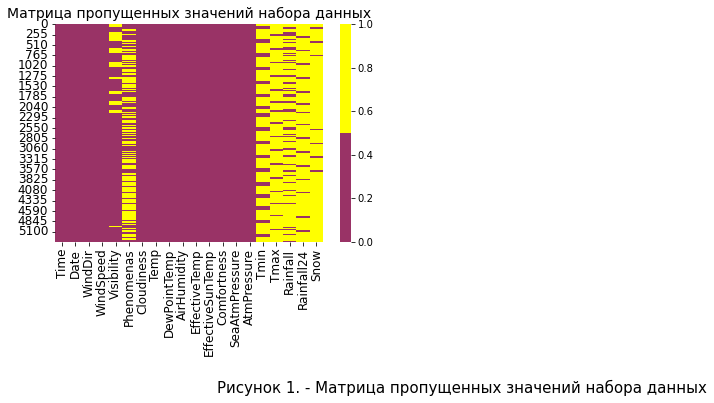

In [5]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.4, "Рисунок 1. - Матрица пропущенных значений набора данных", fontsize = 15)
plt.show()

Видим, что есть пропуски в столбцах с данными о видимости, атмосферными явлениями, много пропусков в столбцах минимальной и максимальной температур, в данных о осадках (логично, ведь осадки есть не всегда), кумулятивном столбце о осадках за сутки и в информации о снежном покрове (позже посмотрим, в какие месяц за последние два года был снег).

***
Для наших целей такой количество столбцов избыточно. Кроме того, чтобы соотнести количество ДТП с погодой, необходимо, чтобы информация о погоде была посуточно (в наборе данных о ДТП именно такая разбивка). <br>
Поэтому группируем данные по дате, берем медианы значений скорости ветра, видимости, температуры, влажности, атмосферного давления за сутки. Данные за сутки о дожде и высоте снежного покрова суммируем.

In [6]:
agg_func_math = {
    'WindSpeed': ['median'], 'Visibility': ['median'], 'Temp': ['median'],
    'AirHumidity': ['median'], 'AtmPressure': ['median'], 
    'Rainfall24': ['sum'], 'Snow': ['sum'] 
}

In [7]:
data_grp = df.groupby('Date').agg(agg_func_math).round(2)
data_grp.head(10)

,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow
,median,median,median,median,median,sum,sum
Date,,,,,,,
2021-01-01,2.0,4000.0,-0.20,96.0,998.20,10.0,11.0
2021-01-02,1.0,4000.0,-0.10,96.0,997.05,11.0,12.0
2021-01-03,0.5,10000.0,0.55,90.5,1008.90,0.9,16.0
2021-01-04,1.5,4000.0,-0.90,94.0,1008.85,4.4,15.0
2021-01-05,0.5,4000.0,-1.30,94.0,1009.10,0.8,18.0
2021-01-06,0.5,4000.0,-3.55,88.0,1004.50,1.4,17.0
2021-01-07,0.0,4000.0,-4.90,89.0,1000.65,9.3,21.0
2021-01-08,1.0,4000.0,-4.35,91.0,994.15,0.6,21.0


Поскольку агрегирование таблицы делали по дате, столбец стал индексами. Для дальнейшей работы нам необходимо перевести его в признаки, а индексы обнулить (переиндексировать):

In [8]:
data_grp['Date']=data_grp.index
data_grp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669 entries, 2021-01-01 to 2022-10-31
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (WindSpeed, median)    669 non-null    float64       
 1   (Visibility, median)   669 non-null    float64       
 2   (Temp, median)         669 non-null    float64       
 3   (AirHumidity, median)  669 non-null    float64       
 4   (AtmPressure, median)  669 non-null    float64       
 5   (Rainfall24, sum)      669 non-null    float64       
 6   (Snow, sum)            669 non-null    float64       
 7   (Date, )               669 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 47.0 KB


In [9]:
df = data_grp.reset_index(drop=True)

In [10]:
# Сделаем удобные названия столбцов:

df.columns = ['WindSpeed', 'Visibility', 'Temp', 
              'AirHumidity', 'AtmPressure', 'Rainfall24',
             'Snow', 'Date']

In [11]:
#Поменяем столбцы местами, передвинув дату в начало

df = df.reindex(columns=['Date', 'WindSpeed', 'Visibility', 
                         'Temp', 'AirHumidity', 'AtmPressure', 
                         'Rainfall24', 'Snow'])

In [12]:
df

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow
0,2021-01-01,2.0,4000.0,-0.20,96.0,998.20,10.0,11.0
1,2021-01-02,1.0,4000.0,-0.10,96.0,997.05,11.0,12.0
2,2021-01-03,0.5,10000.0,0.55,90.5,1008.90,0.9,16.0
3,2021-01-04,1.5,4000.0,-0.90,94.0,1008.85,4.4,15.0
4,2021-01-05,0.5,4000.0,-1.30,94.0,1009.10,0.8,18.0
...,...,...,...,...,...,...,...,...
664,2022-10-27,0.5,19500.0,2.70,77.5,1002.90,0.0,0.0
665,2022-10-28,0.0,10000.0,7.75,90.5,1003.25,1.4,0.0
666,2022-10-29,1.0,19000.0,9.60,92.0,992.10,2.8,0.0
667,2022-10-30,2.0,20000.0,6.95,77.0,980.00,8.0,0.0


### Загрузим второй датасет с данными о количестве ДТП по сообщениям пользователей яндекс-навигатора

In [13]:
df_ra = pd.read_csv('data/moscow_road_accidents.csv', 
                    parse_dates=True, sep=";")
df_ra.columns = ['Date', 'RoadAccs']
df_ra

,Date,RoadAccs
0,2021-05-24 00:00:00,985
1,2021-05-25 00:00:00,1197
2,2021-05-26 00:00:00,1254
3,2021-05-27 00:00:00,1268
4,2021-05-28 00:00:00,1176
...,...,...
521,2022-10-27 00:00:00,903
522,2022-10-28 00:00:00,1093
523,2022-10-29 00:00:00,693
524,2022-10-30 00:00:00,474


Видим, что данные состоят из 526 строк, начинаются 24 мая 2021 (в DataLens есть возможность собрать данные по текущий день) 

Проверим формат данных:

In [14]:
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      526 non-null    object
 1   RoadAccs  526 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB


Переведем данные в столбце Date в формат datetime:

In [15]:
df_ra['Date'] = pd.to_datetime(df_ra['Date'])
df_ra

,Date,RoadAccs
0,2021-05-24,985
1,2021-05-25,1197
2,2021-05-26,1254
3,2021-05-27,1268
4,2021-05-28,1176
...,...,...
521,2022-10-27,903
522,2022-10-28,1093
523,2022-10-29,693
524,2022-10-30,474


In [16]:
# Убедимся, что формат изменился:
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      526 non-null    datetime64[ns]
 1   RoadAccs  526 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


Проверим, какая погода была в день начала обучения на курсе:

In [17]:
df.loc[df['Date'] == '2022-09-06']

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow
613,2022-09-06,2.0,20000.0,8.6,76.5,1000.15,1.0,0.0


Далее объединим два набора данных в один по столбцу с датой:

In [18]:
df=df.merge(df_ra, how='outer')
df

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs
0,2021-01-01,2.0,4000.0,-0.20,96.0,998.20,10.0,11.0,NaN
1,2021-01-02,1.0,4000.0,-0.10,96.0,997.05,11.0,12.0,NaN
2,2021-01-03,0.5,10000.0,0.55,90.5,1008.90,0.9,16.0,NaN
3,2021-01-04,1.5,4000.0,-0.90,94.0,1008.85,4.4,15.0,NaN
4,2021-01-05,0.5,4000.0,-1.30,94.0,1009.10,0.8,18.0,NaN
...,...,...,...,...,...,...,...,...,...
664,2022-10-27,0.5,19500.0,2.70,77.5,1002.90,0.0,0.0,903.0
665,2022-10-28,0.0,10000.0,7.75,90.5,1003.25,1.4,0.0,1093.0
666,2022-10-29,1.0,19000.0,9.60,92.0,992.10,2.8,0.0,693.0
667,2022-10-30,2.0,20000.0,6.95,77.0,980.00,8.0,0.0,474.0


Поскольку нас интересуют лишь дни, в которых есть информация о ДТП, избавимся от строк, в которых этих данных нет: 

In [19]:
df = df[df['RoadAccs'].notnull()]
df

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs
143,2021-05-24,1.0,10000.0,16.20,47.5,999.15,0.7,0.0,985.0
144,2021-05-25,1.0,10000.0,16.10,50.0,1003.55,0.0,0.0,1197.0
145,2021-05-26,1.0,10000.0,20.05,45.5,1001.35,0.0,0.0,1254.0
146,2021-05-27,0.0,10000.0,17.05,84.5,999.40,16.0,0.0,1268.0
147,2021-05-28,0.0,10000.0,17.75,78.5,994.90,2.0,0.0,1176.0
...,...,...,...,...,...,...,...,...,...
664,2022-10-27,0.5,19500.0,2.70,77.5,1002.90,0.0,0.0,903.0
665,2022-10-28,0.0,10000.0,7.75,90.5,1003.25,1.4,0.0,1093.0
666,2022-10-29,1.0,19000.0,9.60,92.0,992.10,2.8,0.0,693.0
667,2022-10-30,2.0,20000.0,6.95,77.0,980.00,8.0,0.0,474.0


Получили те де 526 строк, как в наборе данных о ДТП. Проверим информацию о полученном наборе данных:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 143 to 668
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         526 non-null    datetime64[ns]
 1   WindSpeed    526 non-null    float64       
 2   Visibility   526 non-null    float64       
 3   Temp         526 non-null    float64       
 4   AirHumidity  526 non-null    float64       
 5   AtmPressure  526 non-null    float64       
 6   Rainfall24   526 non-null    float64       
 7   Snow         526 non-null    float64       
 8   RoadAccs     526 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 41.1 KB


Видим, что за исклчением столбца с датой, все остальные являются численными. Проверим данные на пропуски:

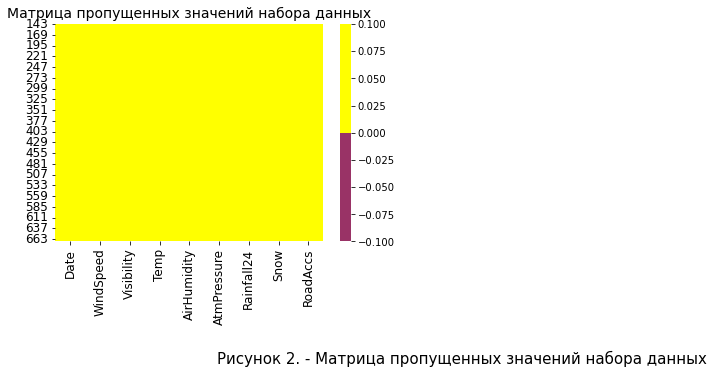

In [21]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.3, "Рисунок 2. - Матрица пропущенных значений набора данных", fontsize = 15)
plt.show()

Пропусков нет, но чтобы удостовериться в этом, используем следующую функцию:

In [22]:
df.isnull().sum()

Date           0
WindSpeed      0
Visibility     0
Temp           0
AirHumidity    0
AtmPressure    0
Rainfall24     0
Snow           0
RoadAccs       0
dtype: int64

# 2. Исследовательский анализ данных

Вновь посмотрим на наш датасет

In [23]:
df

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs
143,2021-05-24,1.0,10000.0,16.20,47.5,999.15,0.7,0.0,985.0
144,2021-05-25,1.0,10000.0,16.10,50.0,1003.55,0.0,0.0,1197.0
145,2021-05-26,1.0,10000.0,20.05,45.5,1001.35,0.0,0.0,1254.0
146,2021-05-27,0.0,10000.0,17.05,84.5,999.40,16.0,0.0,1268.0
147,2021-05-28,0.0,10000.0,17.75,78.5,994.90,2.0,0.0,1176.0
...,...,...,...,...,...,...,...,...,...
664,2022-10-27,0.5,19500.0,2.70,77.5,1002.90,0.0,0.0,903.0
665,2022-10-28,0.0,10000.0,7.75,90.5,1003.25,1.4,0.0,1093.0
666,2022-10-29,1.0,19000.0,9.60,92.0,992.10,2.8,0.0,693.0
667,2022-10-30,2.0,20000.0,6.95,77.0,980.00,8.0,0.0,474.0


Видим, что в результате удаления строк, в которхы не было данных о ДТП, сбилась индексация. Исправим. 

In [24]:
df = df.reset_index(drop=True)

In [25]:
df.shape

(526, 9)

Проверим, есть ли в нашем наборе категорийные данные.

In [26]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('В нашем датафрейме {} категорийных переменных\n'.format(len(categorical)))

print('Категорйиные переменные :', categorical)

В нашем датафрейме 0 категорийных переменных

Категорйиные переменные : []


In [27]:
# А что насчет числовых данных?

numerical = [var for var in df.columns if df[var].dtype!='O']

print('В нашем датафрейме {} числовых столбцов\n'.format(len(numerical)))

print('Это следующие столбцы :', numerical)

В нашем датафрейме 9 числовых столбцов

Это следующие столбцы : ['Date', 'WindSpeed', 'Visibility', 'Temp', 'AirHumidity', 'AtmPressure', 'Rainfall24', 'Snow', 'RoadAccs']


Собственно, весь наш набор состоит из числовых значений.

In [28]:
# Есть ли в них пропуски данных?

df[numerical].isnull().sum()

Date           0
WindSpeed      0
Visibility     0
Temp           0
AirHumidity    0
AtmPressure    0
Rainfall24     0
Snow           0
RoadAccs       0
dtype: int64

Text(0, 0.5, 'RoadAccs')

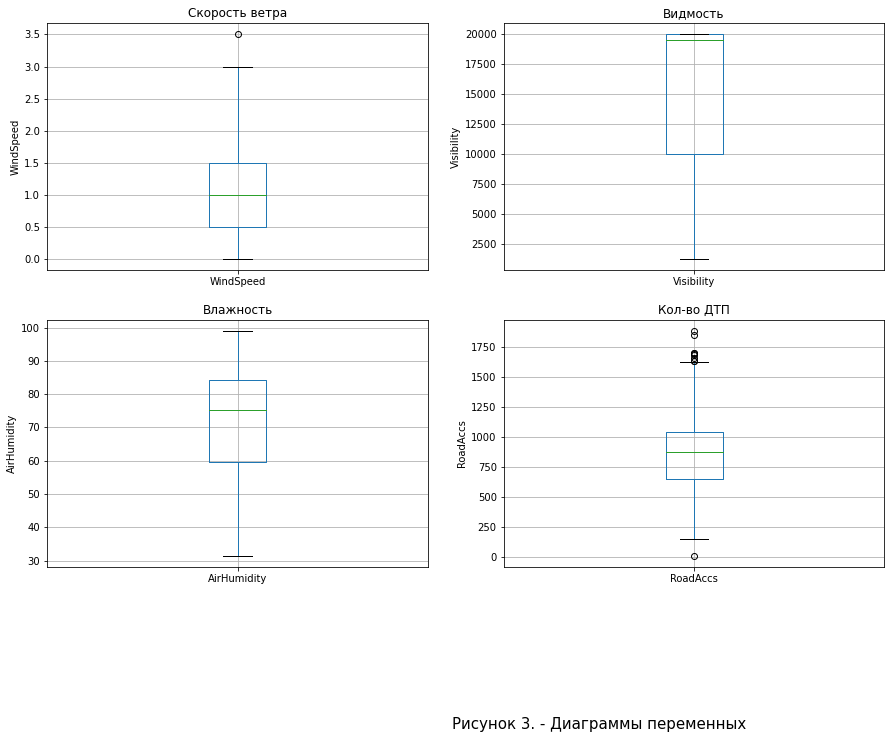

In [29]:
# Построим "ящичные" диаграммы для визуализации выбросов

plt.figure(figsize=(15,10))
plt.figtext(0.5, -0.1, "Рисунок 3. - Диаграммы переменных", fontsize = 15)

plt.subplot(2, 2, 1)
fig = df.boxplot(column='WindSpeed')
fig.set_title('Скорость ветра')
fig.set_ylabel('WindSpeed')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Visibility')
fig.set_title('Видмость')
fig.set_ylabel('Visibility')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='AirHumidity')
fig.set_title('Влажность')
fig.set_ylabel('AirHumidity')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='RoadAccs')
fig.set_title('Кол-во ДТП')
fig.set_ylabel('RoadAccs')

Видим выбросы у скорости ветра и количестве ДТП. Скорее всего, ошибка при сборе датасета.

In [30]:
df['RoadAccs'].nlargest(n=5)

215    1884.0
211    1853.0
210    1700.0
200    1697.0
212    1692.0
Name: RoadAccs, dtype: float64

In [31]:
df['RoadAccs'].nsmallest(n=5)

525      9.0
222    151.0
350    174.0
343    208.0
223    213.0
Name: RoadAccs, dtype: float64

In [32]:
df['RoadAccs'].median()

870.0

In [33]:
df.at[525, 'RoadAccs'] = 870

Проверим распределение данных по ДТП. нормальное ли оно или скошенное?

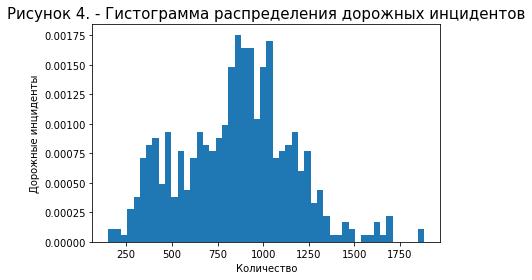

In [34]:
x = df['RoadAccs']
s_array = df[['RoadAccs']].to_numpy()

num_bins = 50

fig, ax = plt.subplots()

# гистограмма данных
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_xlabel('Количество')
ax.set_ylabel('Дорожные инциденты')
ax.set_title(r"Рисунок 4. - Гистограмма распределения дорожных инцидентов", fontsize = 15)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Рисунок 5 - Гистограмма осадков')

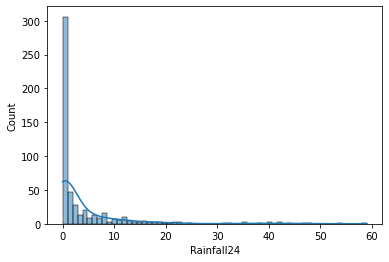

In [35]:
# Построим гистограмму распределения осадков
sns.histplot(df['Rainfall24'], kde=True)
ax.set_title(r'Рисунок 5 - Гистограмма осадков')

In [ ]:
# А так выглядит распределение осадков в течение обозреваемого периода
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Rainfall24'])])
fig.update_layout(legend_orientation="h", title_text='Рисунок 6 - Осадки за два года',
                 title_y = 0.07)

fig.show()

<img align="center" src="img/pic6.png" height="1200" width="1200">

In [ ]:
# Можно построить распределение осадков по датам с помощью библиотеки plotty express, 
# это добавит интерактивности (можно менять срезы) 
fig = px.bar(df, x=df['Date'], y='Rainfall24', title='Осадки')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(legend_orientation="h", title_text='Рисунок 7 - Осадки за два года, интерактивный',
                 title_y = 0.07)
fig.show()

<img align="center" src="img/pic7.png" height="1200" width="1200">

In [ ]:
# А следующая гистограмма покажет распределение ДТП в зависимости от количества осадков
# Можо посмотреть, какая при этом была температура

fig = px.histogram(df, x="RoadAccs", y="Rainfall24", color="Temp", 
                   marginal="rug", hover_data=df.columns, title="")
fig.update_layout(title_text='Рисунок 8 - ДТП в зависимости от осадков и какая при этом была температура',
                 title_y = 0.04)
fig.show()

<img align="center" src="img/pic8.png" height="1200" width="1200">

Для анализа распределения количества ДТП по месяцам и дням добавим в датафрейм два новых столбца, взяв данные из столбца с датами, воспользуемся методом библиотеки Пандас DatetimeIndex:

In [36]:
df['month'] = pd.DatetimeIndex(df['Date']).month

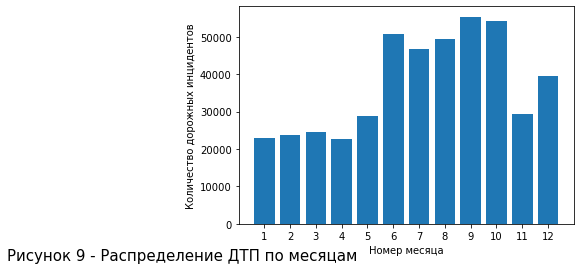

In [37]:
months = range(1,13)
results = df.groupby('month').sum()
plt.bar(months, results['RoadAccs'])
plt.xticks(months)
plt.ylabel('Количество дорожных инцидентов')
plt.xlabel('Номер месяца')
plt.figtext(0,0,'Рисунок 9 - Распределение ДТП по месяцам ', fontsize=15, ha='center')

plt.show()

Видим, что наибольшее количество ДТП происходит с июня по октябрь, также выше среднего их в декабре.

In [38]:
df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).day_name()

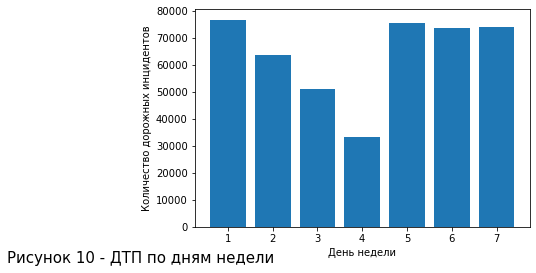

In [39]:
day_of_week = range(1,8)
results = df.groupby('DayOfWeek').sum()
plt.bar(day_of_week, results['RoadAccs'])
plt.xticks(day_of_week)
plt.ylabel('Количество дорожных инцидентов')
plt.xlabel('День недели')
plt.figtext(0,0,'Рисунок 10 - ДТП по дням недели', fontsize=15, ha='center')
plt.show()

На графике видно четкую тенденцию снижения количества ДТП с начала недели к четвергу, затем, очевидно, накапливается усталость и пятницу вновь происходит рост. Большое количество ДТП на выходных, видимо, объясняется тем, что за руль садятся люди, которые в течение рабочей недели пользуются общественным транспортом.

In [40]:
df['Rainfall24'].describe()

count    526.000000
mean       3.737643
std        8.044042
min        0.000000
25%        0.000000
50%        0.300000
75%        3.950000
max       59.000000
Name: Rainfall24, dtype: float64

In [41]:
df.loc[df['Rainfall24'] == 59]

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs,month,DayOfWeek
80,2021-08-12,0.0,4000.0,19.55,93.5,991.8,59.0,0.0,1003.0,8,Thursday


Таким образом, 12 августа 2021 был самым "мокрым" днем за последние два года.

# 3. Посмотрим статистические показатели набора

- Посмотрим среднее значение, дисперсию и стандартное отклонение для переменных. 
- Определим корелляцию между данными, визуализируем ее. 
- Построим линейную регрессию зависимости между ценой продукта и его рейтингом.

In [42]:
round(df[numerical].describe(),1)

,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs
count,526.0,526.0,526.0,526.0,526.0,526.0,526.0,526.0
mean,1.0,15721.9,9.8,71.5,996.4,3.7,6.1,852.3
std,0.7,5305.1,10.1,15.7,10.0,8.0,12.3,306.2
min,0.0,1200.0,-21.0,31.5,954.8,0.0,0.0,151.0
25%,0.5,10000.0,1.8,59.6,990.2,0.0,0.0,645.0
50%,1.0,19500.0,9.6,75.2,996.6,0.3,0.0,870.5
75%,1.5,20000.0,18.8,84.4,1002.6,4.0,2.0,1038.0
max,3.5,20000.0,30.0,99.0,1024.8,59.0,49.0,1884.0


In [43]:
round(df['RoadAccs'].describe(),1)

count     526.0
mean      852.3
std       306.2
min       151.0
25%       645.0
50%       870.5
75%      1038.0
max      1884.0
Name: RoadAccs, dtype: float64

count - количество значений, mean - среднее значение, std — стандартное отклонение значения.
min — минимальное значение,  max — максимальное значение

In [44]:
# Дисперсию определим с помощью библиотеки Numpy
print(round(df.RoadAccs.var(), 1))

93767.3


В статистике дисперсия - это мера того, насколько отдельные (числовые) значения в наборе данных
отличаются от среднего или среднего значения . Дисперсия часто используется для количественной
оценки разброса или дисперсии. Распространение - это характеристикавыборки или генеральной
совокупности, которая описывает степень ее изменчивости.
Высокая дисперсия говорит нам о том, что значения в нашем наборе данных далеки от своего среднего.
Таким образом, наши данные будут иметь высокий уровень изменчивости. 

Определим самый спокойный день в исследуемом периоде

In [45]:
df.loc[df['RoadAccs'] == 9]

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs,month,DayOfWeek


А теперь -- самый аварийный

In [46]:
df.loc[df['RoadAccs'] == 1884]

,Date,WindSpeed,Visibility,Temp,AirHumidity,AtmPressure,Rainfall24,Snow,RoadAccs,month,DayOfWeek
215,2021-12-25,1.5,6100.0,-10.9,82.0,975.05,12.0,25.0,1884.0,12,Saturday


Определим корелляцию данных и построим график корелляции

In [47]:
corr = df.corr()

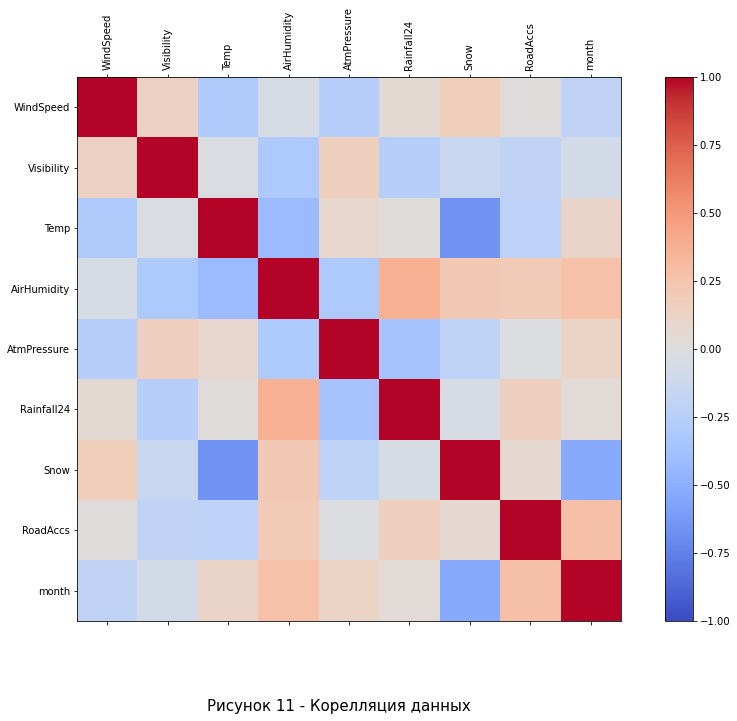

In [48]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
#ax.set_xticks(ticks)
plt.xticks(rotation=90)
#ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.figtext(.5,0,'Рисунок 11 - Корелляция данных', fontsize=15, ha='center')
plt.show()

Видим, что высота снежного покрова сильно зависит от месяца и от температуры(очевидно).
Также очевидная зависимость влажности от наличия осдаков.
Интересующая нас переменна данных о ДТП имеет слабую корелляцию с месяцем. Корелляция с остальными переменными незначительна.
В числовом виде это выглядит так:

<AxesSubplot:>

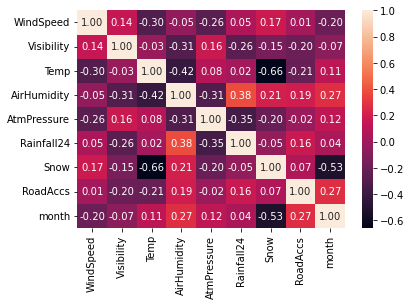

In [49]:
sns.heatmap(corr, annot=True, fmt='.2f')

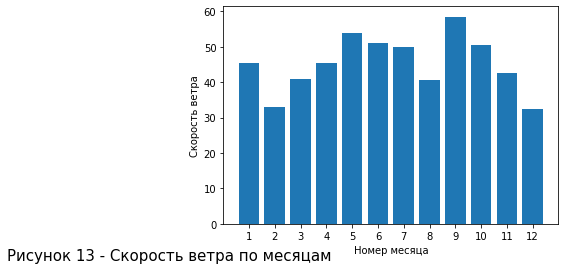

In [50]:
months = range(1,13)
results = df.groupby('month').sum()
plt.bar(months, results['WindSpeed'])
plt.xticks(months)
plt.ylabel('Скорость ветра')
plt.xlabel('Номер месяца')
plt.figtext(0,0,'Рисунок 13 - Скорость ветра по месяцам', fontsize=15, ha='center')
plt.show()

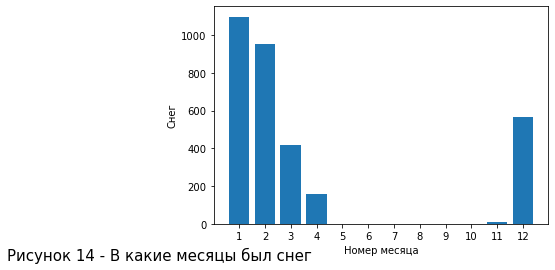

In [51]:
months = range(1,13)
results = df.groupby('month').sum()
plt.bar(months, results['Snow'])
plt.xticks(months)
plt.ylabel('Снег')
plt.xlabel('Номер месяца')
plt.figtext(0,0,'Рисунок 14 - В какие месяцы был снег', fontsize=15, ha='center')
plt.show()

Распределение ДТП

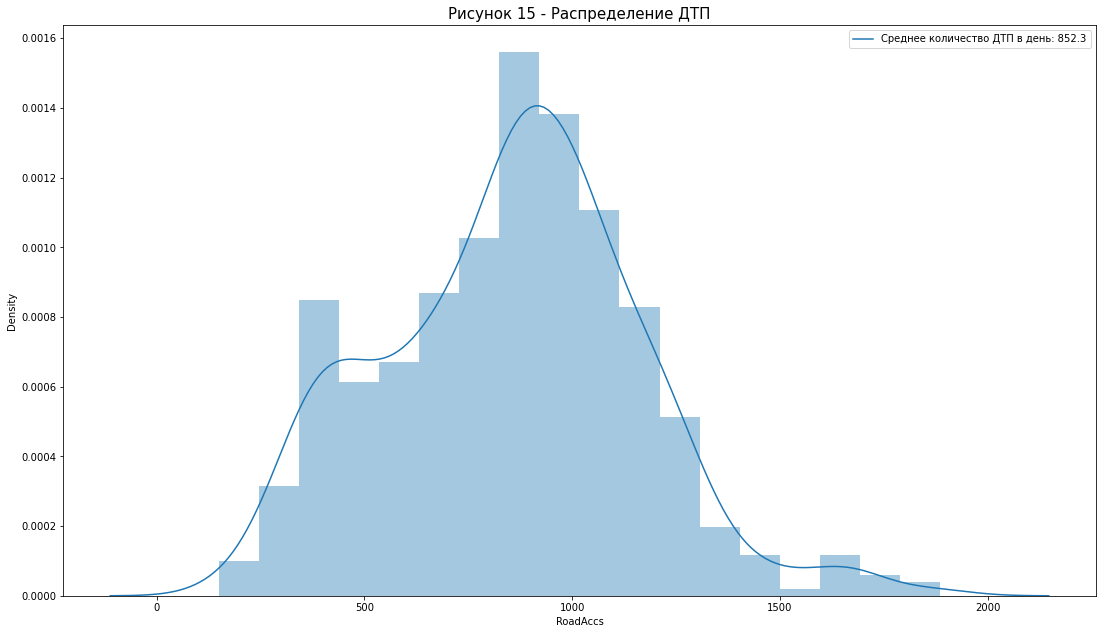

In [52]:
sns.distplot(df["RoadAccs"], hist = True,)
plt.legend(['Среднее количество ДТП в день: ' + str(np.round(df["RoadAccs"].mean(), 1))],loc = 1)
plt.title ("Рисунок 15 - Распределение ДТП",fontsize = 15)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

Распределение ДТП с нормализацией

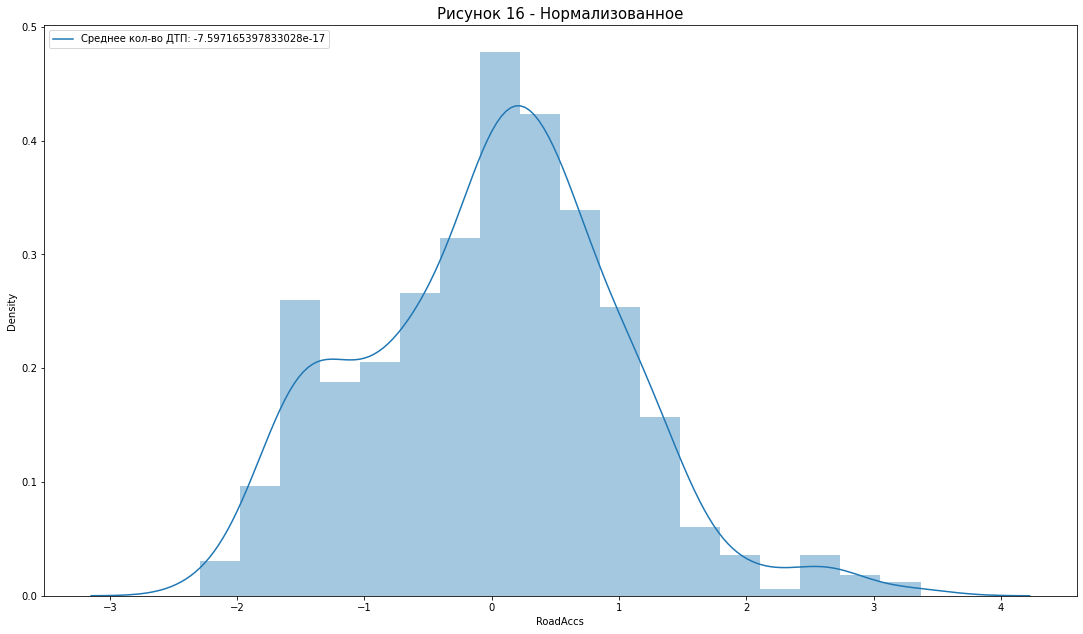

In [53]:
normalised_ra =(df["RoadAccs"]-df["RoadAccs"].mean())/df["RoadAccs"].std()
sns.distplot(normalised_ra, hist = True)
plt.legend(['Среднее кол-во ДТП: ' + str(normalised_ra.mean())],loc = 2)
plt.title ("Рисунок 16 - Нормализованное",fontsize = 15)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [54]:
normalised_ra.mean()

-7.597165397833028e-17

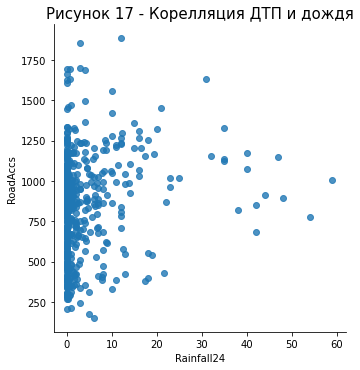

In [55]:
sns.lmplot(x="Rainfall24", y="RoadAccs", data=df, fit_reg=False)
plt.title("Рисунок 17 - Корелляция ДТП и дождя", fontsize = 15)
plt.show()

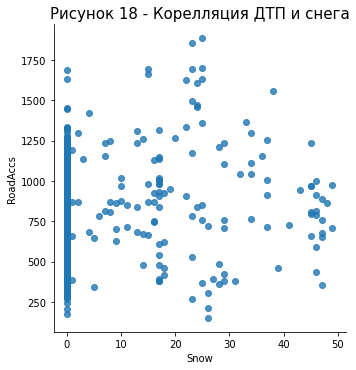

In [56]:
sns.lmplot(x="Snow", y="RoadAccs", data=df, fit_reg=False)
plt.title("Рисунок 18 - Корелляция ДТП и снега", fontsize = 15)
plt.show()

# 4. Проверка Гипотезы


In [57]:
mu = normalised_ra.mean()
sigma = normalised_ra.std(ddof=0)
print("Среднее кол-во ДТП: ", mu, ", Сигма ДТП:", sigma)

Среднее кол-во ДТП:  -7.597165397833028e-17 , Сигма ДТП: 0.9990489774358359


### Корреляция Пирсона

Статистический тест для проверки связи двух количественных переменных называется корелляцией Пирсона.

<b>Пирсон Корреляционный</b> тест используется для анализа силы связи между двумя предоставленными переменными, обеими количественными по своей природе. Значение, или сила корреляции Пирсона, будет находиться между +1 и -1 .

Корреляция 1 указывает на совершенную связь между переменными, причем корреляция либо положительная, либо отрицательная. Коэффициенты корреляции около 0 указывают на очень слабые, почти несуществующие корреляции. Хотя существуют и другие способы измерения корреляций между двумя переменными, такие как корреляция Спирмена или ранговая корреляция Кендалла , корреляция Пирсона, вероятно, является наиболее часто используемым корреляционным тестом.

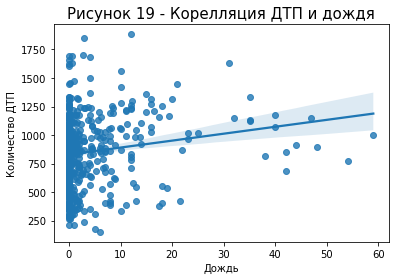

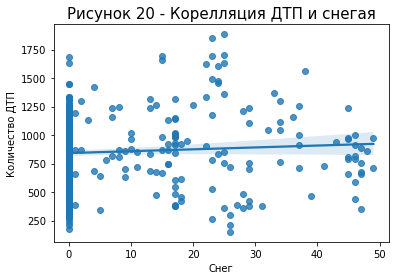

Зависимость количества ДТП от дождя
(0.15962363332096413, 0.00023710163131864263)
Зависимость количества ДТП от снега
(0.06603029035069101, 0.13042390190020858)


In [58]:
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()
plt.title("Рисунок 19 - Корелляция ДТП и дождя", fontsize = 15)
plt_regression('Rainfall24', 'RoadAccs', df, 'Дождь', 'Количество ДТП')
plt.title("Рисунок 20 - Корелляция ДТП и снегая", fontsize = 15)
plt_regression('Snow', 'RoadAccs', df, 'Снег', 'Количество ДТП')

print('Зависимость количества ДТП от дождя')
print(pearsonr(df['RoadAccs'], df['Rainfall24']))

print('Зависимость количества ДТП от снега')
print(pearsonr(df['RoadAccs'], df['Snow']))


Первое значение - это направление и сила корреляции, а второе-Р-значение. 
Эти цифры свидетельствуют о слабой корреляции между ДТП и осадками.

Таким образом, наша гипотеза о взаимосвязи ДТП и погодных явлений не подтвердилась.

# 5. Выводы

- Наибольшее количество ДТП в Москве происходит с июня по октябрь, также выше среднего их в декабре. Возможно, это связано с дачным сезоном.

- Больше всего ДТП происходит с пятницы по понедельник, к четвергу есть тенденция снижения.

- Высота снежного покрова сильно зависит от месяца и от температуры(очевидно). Также очевидна зависимость влажности от наличия осдаков. Количество ДТП имеет слабую корелляцию с дождем, температурой, месяцем и видимостью. С остальными переменными корелляция ДТП крайне мала. 

- Гипотеза о том, что осадки влияют на ДТП на дорогах не подтвердилась.

## Ссылки

При работе над данным исследованием использовались следующие источники и литература:

1. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на
Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.:
Питер, 2019.

2.  Шарден Б., Массарон Л., Боскетти А., Крупномасштабное машинное обучение вместе с Python. Пер.
с анг. А. В. Логунова. – М.: ДМК Пресс, 2018.

3. https://stackoverflow.com

4. https://pythobyte.com/how-to-get-the-variance-of-a-list-in-python-a254719a/

5. https://datalens.yandex.ru

6. http://www.pogodaiklimat.ru/

7. https://habr.com/ru/post/557998/

8. https://pythobyte.com/statistical-hypothesis-analysis-in-python-with-anovas-chi-square-and-pearson-correlation-be15ad06/

9. https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression